In [ ]:
%matplotlib inline

In [ ]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image
from matplotlib.pyplot import figure

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


env = gym.make('FrozenLake-v0', is_slippery=False).unwrapped
o = env
env.render()

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


SFFF
FHFH
FFFH
HFFG




*   Number of actions = 4
*   Number of locations =  16
*   Actions  = Right = 2, Left = 0, UP = 3, Down = 1
*   Locations = 0 -> 15



In [ ]:
print(env.observation_space)
print(env.action_space)

Discrete(16)
Discrete(4)


Testing the enviorment

In [ ]:
env.reset()
env.step(2)
env.render()
env.step(1)
env.render()
env.reset()

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


0

In [ ]:
#Creating the Q-Table
#Actions  by NumberofStates
# 16 rows by 4 cols
Qtable  =  np.zeros((env.observation_space.n,env.action_space.n));
print(Qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100 #max number of steps before termiantion
BATCH_SIZE = 128
GAMMA = 0.999 #Discount rate
ALPHA = 0.1  #Learning rate
EPS_START = 0.9   #exploration rate
EPS_MAX = 0.9
EPS_END = 0.05  #min exploiration rate
EPS_DECAY = 200 #exploration rate of decay
TARGET_UPDATE = 10

Record the total reward and steps in each episode

In [ ]:
episode_steps = []
rewards_all_episodes = []

enc.step() returns 4 objects


---
*   new_state --> Location (Value from 0 to 15)
*   reward --> The reward
*   done --> If the return state is termianl
*   info --> Additional information

In [ ]:
for i_episode in range(num_episodes):
    state = env.reset()
    done =  False
    episodereward =  0
    steps = 0
    #We manually set the reward to 0 and the current state as non termianl. Initilize the first state in the episdoe to the starting point
    for i_steps in range(max_steps_per_episode):
          sample = random.random()
          eps_threshold = EPS_END + (EPS_START - EPS_END) * \
              math.exp(-1. * steps / EPS_DECAY)
          if (sample >  eps_threshold):
            action  =  np.argmax(Qtable[state,:])
          else:
            action = env.action_space.sample()
          #Take action based on the qtable or take a random action
          next_state,reward,done,_ =  env.step(action)
          #Update the Q table
          Qtable[state, action] = Qtable[state, action] * (1 - ALPHA) + \
            ALPHA * (reward + GAMMA * np.max(Qtable[next_state, :]))
          state = next_state
          episodereward += reward 
          steps = steps + 1
          if done == True:
            break
print(Qtable)

[[0.99401498 0.99500999 0.99500999 0.99401498]
 [0.99401498 0.         0.996006   0.99500999]
 [0.99500999 0.997003   0.99500999 0.996006  ]
 [0.996006   0.         0.99500999 0.99500999]
 [0.99500999 0.996006   0.         0.99401498]
 [0.         0.         0.         0.        ]
 [0.         0.998001   0.         0.996006  ]
 [0.         0.         0.         0.        ]
 [0.996006   0.         0.997003   0.99500999]
 [0.996006   0.998001   0.998001   0.        ]
 [0.997003   0.999      0.         0.997003  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.998001   0.999      0.997003  ]
 [0.998001   0.999      1.         0.998001  ]
 [0.         0.         0.         0.        ]]


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100 #max number of steps before termiantion
BATCH_SIZE = 128
GAMMA = 0.999 #Discount rate
ALPHA = 0.1  #Learning rate
EPS_START = 0.9   #exploration rate
EPS_MAX = 0.9
EPS_END = 0.01  #min exploiration rate
EPS_DECAY = 0.01 #exploration rate of decay
TARGET_UPDATE = 10

In [ ]:
for i_episode in range(num_episodes):
    state = env.reset()
    done =  False
    episodereward =  0
    steps = 0
    #We manually set the reward to 0 and the current state as non termianl. Initilize the first state in the episdoe to the starting point
    for i_steps in range(max_steps_per_episode):
          sample = random.random()
          if (sample >  EPS_START):
            action  =  np.argmax(Qtable[state,:])
          else:
            action = env.action_space.sample()
          #Take action based on the qtable or take a random action
          next_state,reward,done,_ =  env.step(action)
          #Update the Q table
          Qtable[state, action] = Qtable[state, action] * (1 - ALPHA) + \
            ALPHA * (reward + GAMMA * np.max(Qtable[next_state, :]))
          state = next_state
          episodereward += reward 
          steps = steps + 1
          if done == True:
            break
#Update the exploration rate after every epsiode
    EPS_START = EPS_END + \
    (EPS_MAX - EPS_END) * math.exp(-EPS_DECAY*i_episode)
#Update the total reward and steps for the episode
    rewards_all_episodes.append(episodereward)
    episode_steps.append(steps)

print(Qtable)


[[0.99401498 0.99500999 0.99500999 0.99401498]
 [0.99401498 0.         0.996006   0.99500999]
 [0.99500999 0.997003   0.99500999 0.996006  ]
 [0.996006   0.         0.99500999 0.99500999]
 [0.99500999 0.996006   0.         0.99401498]
 [0.         0.         0.         0.        ]
 [0.         0.998001   0.         0.996006  ]
 [0.         0.         0.         0.        ]
 [0.996006   0.         0.997003   0.99500999]
 [0.996006   0.998001   0.998001   0.        ]
 [0.997003   0.999      0.         0.997003  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.998001   0.999      0.997003  ]
 [0.998001   0.999      1.         0.998001  ]
 [0.         0.         0.         0.        ]]


In [ ]:
print(rewards_all_episodes)
print(episode_steps)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [ ]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.8830000000000007
2000 :  0.9910000000000008
3000 :  0.9850000000000008
4000 :  0.9940000000000008
5000 :  0.9840000000000008
6000 :  0.9910000000000008
7000 :  0.9860000000000008
8000 :  0.9910000000000008
9000 :  0.9880000000000008
10000 :  0.9920000000000008


Graph steps vs episode                              
Graph reward vs episode

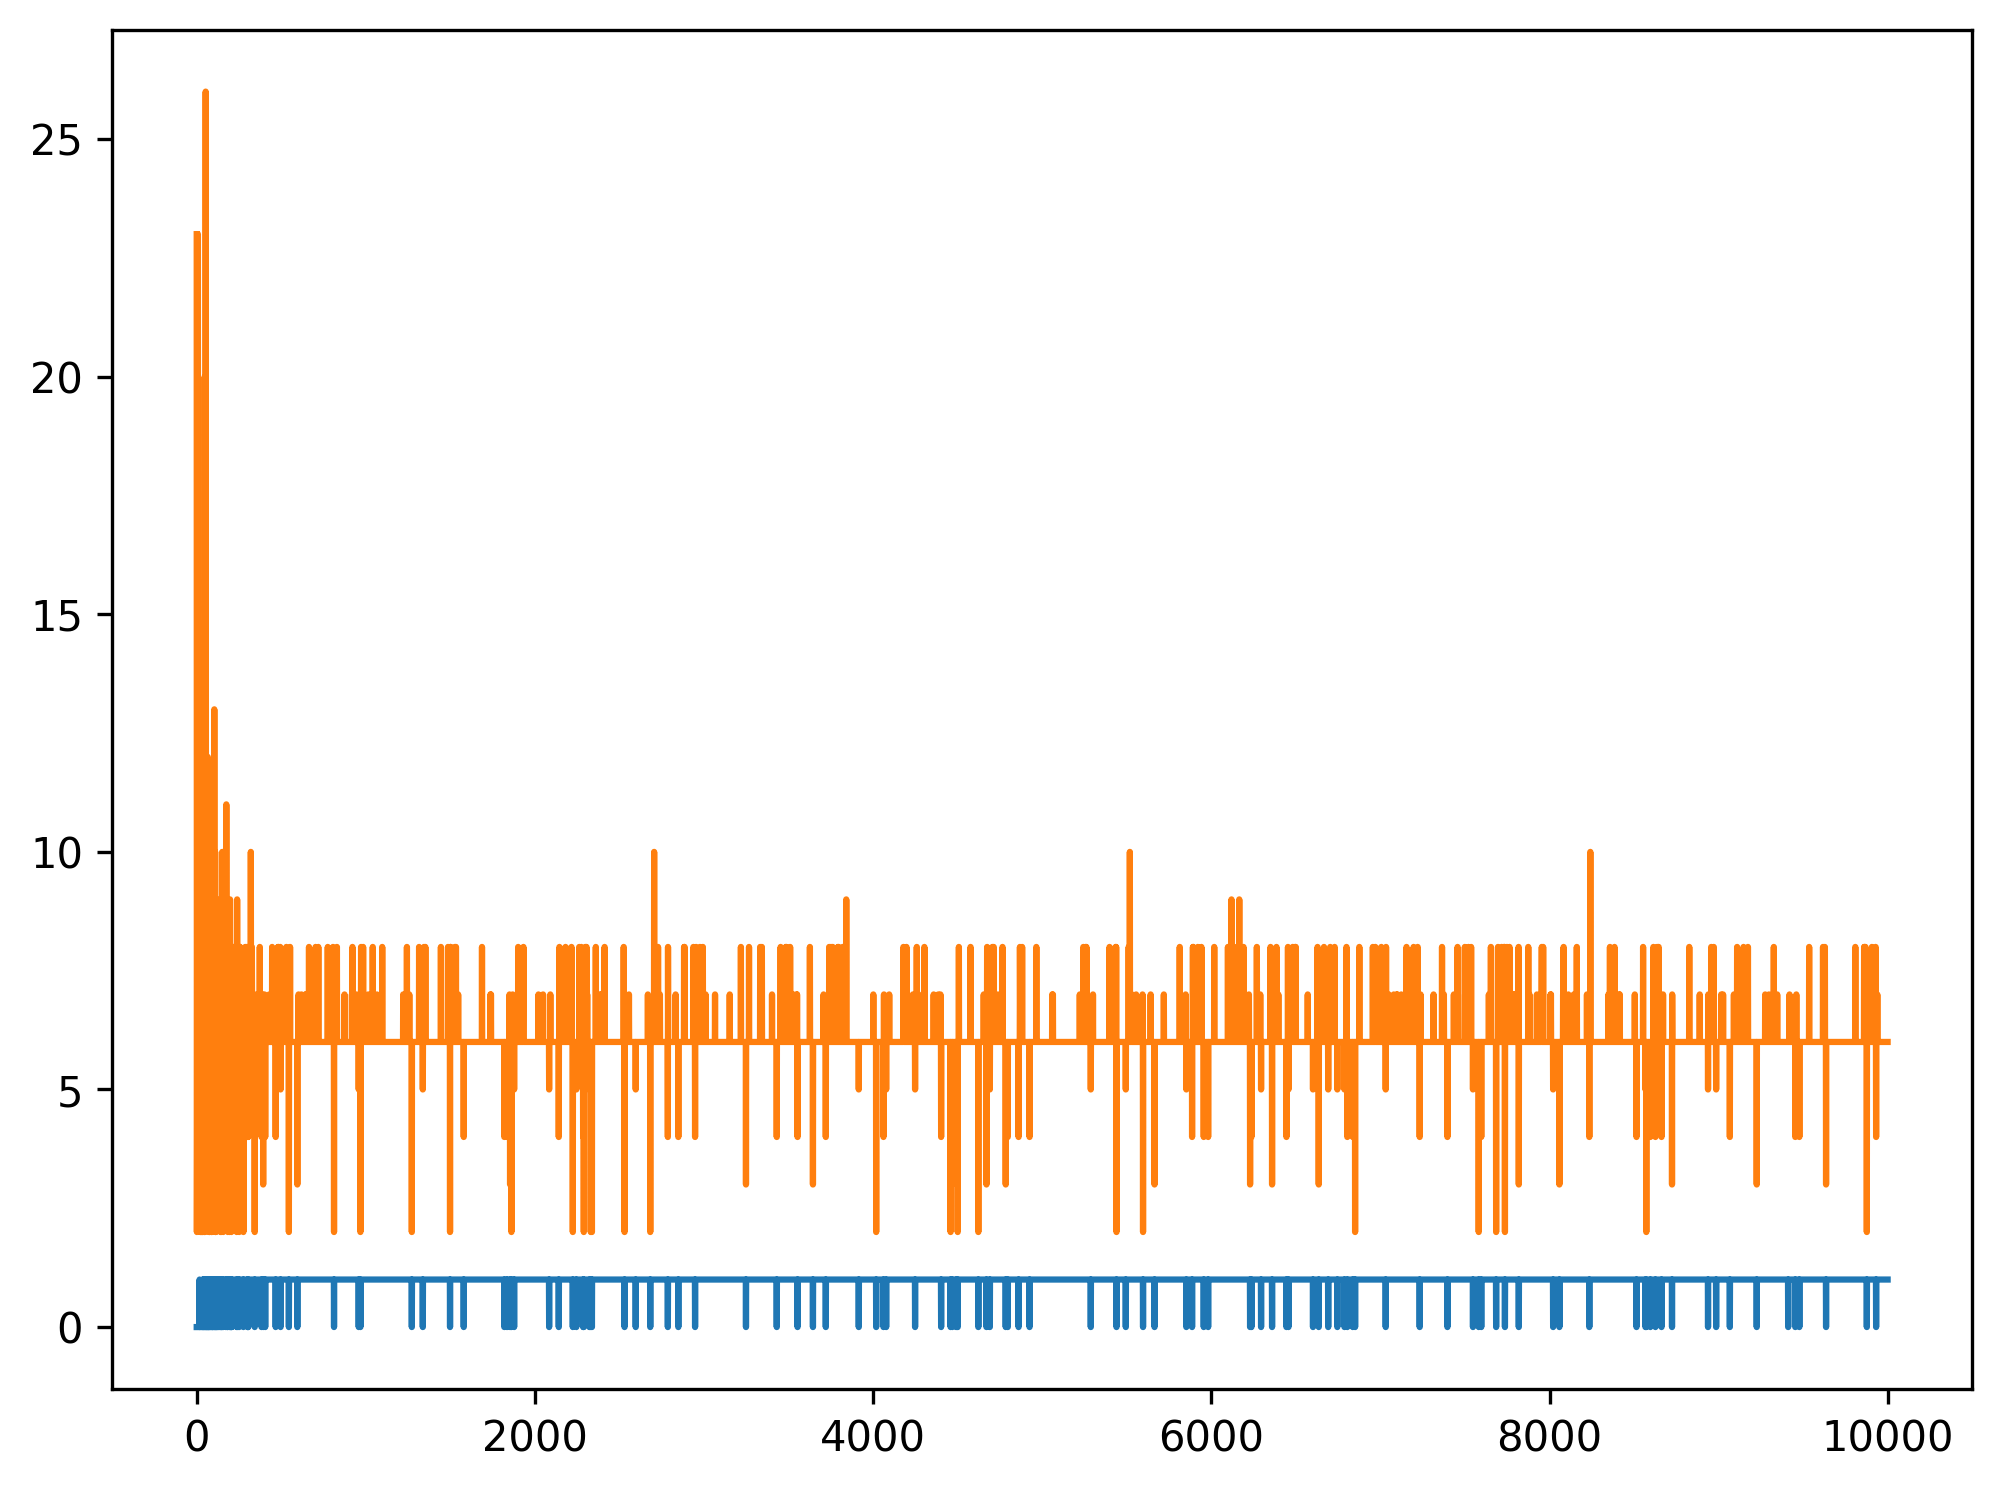

In [ ]:
figure(figsize=(8, 6), dpi=300)
plt.plot(rewards_all_episodes)
plt.plot(episode_steps)

# Retrain

Using the previous q table with a non slippery floor, we retrain it for a slippery floor

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=True).unwrapped
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100 #max number of steps before termiantion
BATCH_SIZE = 128
GAMMA = 0.999 #Discount rate
ALPHA = 0.1  #Learning rate
EPS_START = 0.9   #exploration rate
EPS_MAX = 0.9
EPS_END = 0.05  #min exploiration rate
EPS_DECAY = 200 #exploration rate of decay
TARGET_UPDATE = 10


In [ ]:
episode_steps = []
rewards_all_episodes = []

In [ ]:
for i_episode in range(num_episodes):
    state = env.reset()
    done =  False
    episodereward =  0
    steps = 0
    #We manually set the reward to 0 and the current state as non termianl. Initilize the first state in the episdoe to the starting point
    for i_steps in range(max_steps_per_episode):
          sample = random.random()
          eps_threshold = EPS_END + (EPS_START - EPS_END) * \
              math.exp(-1. * steps / EPS_DECAY)
          if (sample >  eps_threshold):
            action  =  np.argmax(Qtable[state,:])
          else:
            action = env.action_space.sample()
          #Take action based on the qtable or take a random action
          next_state,reward,done,_ =  env.step(action)
          #Update the Q table
          Qtable[state, action] = Qtable[state, action] * (1 - ALPHA) + \
            ALPHA * (reward + GAMMA * np.max(Qtable[next_state, :]))
          state = next_state
          episodereward += reward 
          steps = steps + 1
          if done == True:
            break
print(Qtable)

[[0.80514408 0.80435882 0.80491617 0.8037104 ]
 [0.53373607 0.37877083 0.58237274 0.80257355]
 [0.63857029 0.68683698 0.74767072 0.80296942]
 [0.48145639 0.56497411 0.50067503 0.80362451]
 [0.80750266 0.30437473 0.37891973 0.55895696]
 [0.         0.         0.         0.        ]
 [0.48582916 0.25314147 0.44177807 0.38107675]
 [0.         0.         0.         0.        ]
 [0.43914707 0.49554403 0.58553607 0.80912897]
 [0.64289572 0.81503213 0.50570902 0.53958153]
 [0.72636296 0.63650618 0.45229802 0.38668166]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.53609921 0.4916866  0.87480824 0.6132647 ]
 [0.87696114 0.9650463  0.92866441 0.90756863]
 [0.         0.         0.         0.        ]]


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100 #max number of steps before termiantion
BATCH_SIZE = 128
GAMMA = 0.999 #Discount rate
ALPHA = 0.1  #Learning rate
EPS_START = 0.9   #exploration rate
EPS_MAX = 0.9
EPS_END = 0.01  #min exploiration rate
EPS_DECAY = 0.01 #exploration rate of decay
TARGET_UPDATE = 10

In [ ]:
for i_episode in range(num_episodes):
    state = env.reset()
    done =  False
    episodereward =  0
    steps = 0
    #We manually set the reward to 0 and the current state as non termianl. Initilize the first state in the episdoe to the starting point
    for i_steps in range(max_steps_per_episode):
          sample = random.random()
          if (sample >  EPS_START):
            action  =  np.argmax(Qtable[state,:])
          else:
            action = env.action_space.sample()
          #Take action based on the qtable or take a random action
          next_state,reward,done,_ =  env.step(action)
          #Update the Q table
          Qtable[state, action] = Qtable[state, action] * (1 - ALPHA) + \
            ALPHA * (reward + GAMMA * np.max(Qtable[next_state, :]))
          state = next_state
          episodereward += reward 
          steps = steps + 1
          if done == True:
            break
#Update the exploration rate after every epsiode
    EPS_START = EPS_END + \
    (EPS_MAX - EPS_END) * math.exp(-EPS_DECAY*i_episode)
#Update the total reward and steps for the episode
    rewards_all_episodes.append(episodereward)
    episode_steps.append(steps)

print(Qtable)

[[0.75068144 0.74877342 0.75110955 0.75119027]
 [0.56871032 0.32624052 0.40879172 0.75019688]
 [0.66954891 0.65664798 0.58467504 0.74877605]
 [0.45223812 0.43815018 0.41078914 0.7458581 ]
 [0.74513678 0.65539301 0.61222959 0.58860299]
 [0.         0.         0.         0.        ]
 [0.20465538 0.2000791  0.36595003 0.2009051 ]
 [0.         0.         0.         0.        ]
 [0.50774511 0.59655897 0.52330288 0.73560243]
 [0.37270018 0.71282528 0.58839882 0.50517825]
 [0.63149226 0.52567047 0.48116914 0.40568732]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.53054153 0.68762387 0.78343156 0.53649435]
 [0.80077019 0.93210057 0.86288809 0.84013563]
 [0.         0.         0.         0.        ]]


In [ ]:
print(rewards_all_episodes)
print(episode_steps)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

In [ ]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.5180000000000003
2000 :  0.6170000000000004
3000 :  0.6680000000000005
4000 :  0.7000000000000005
5000 :  0.6660000000000005
6000 :  0.6480000000000005
7000 :  0.6610000000000005
8000 :  0.5950000000000004
9000 :  0.6300000000000004
10000 :  0.6760000000000005


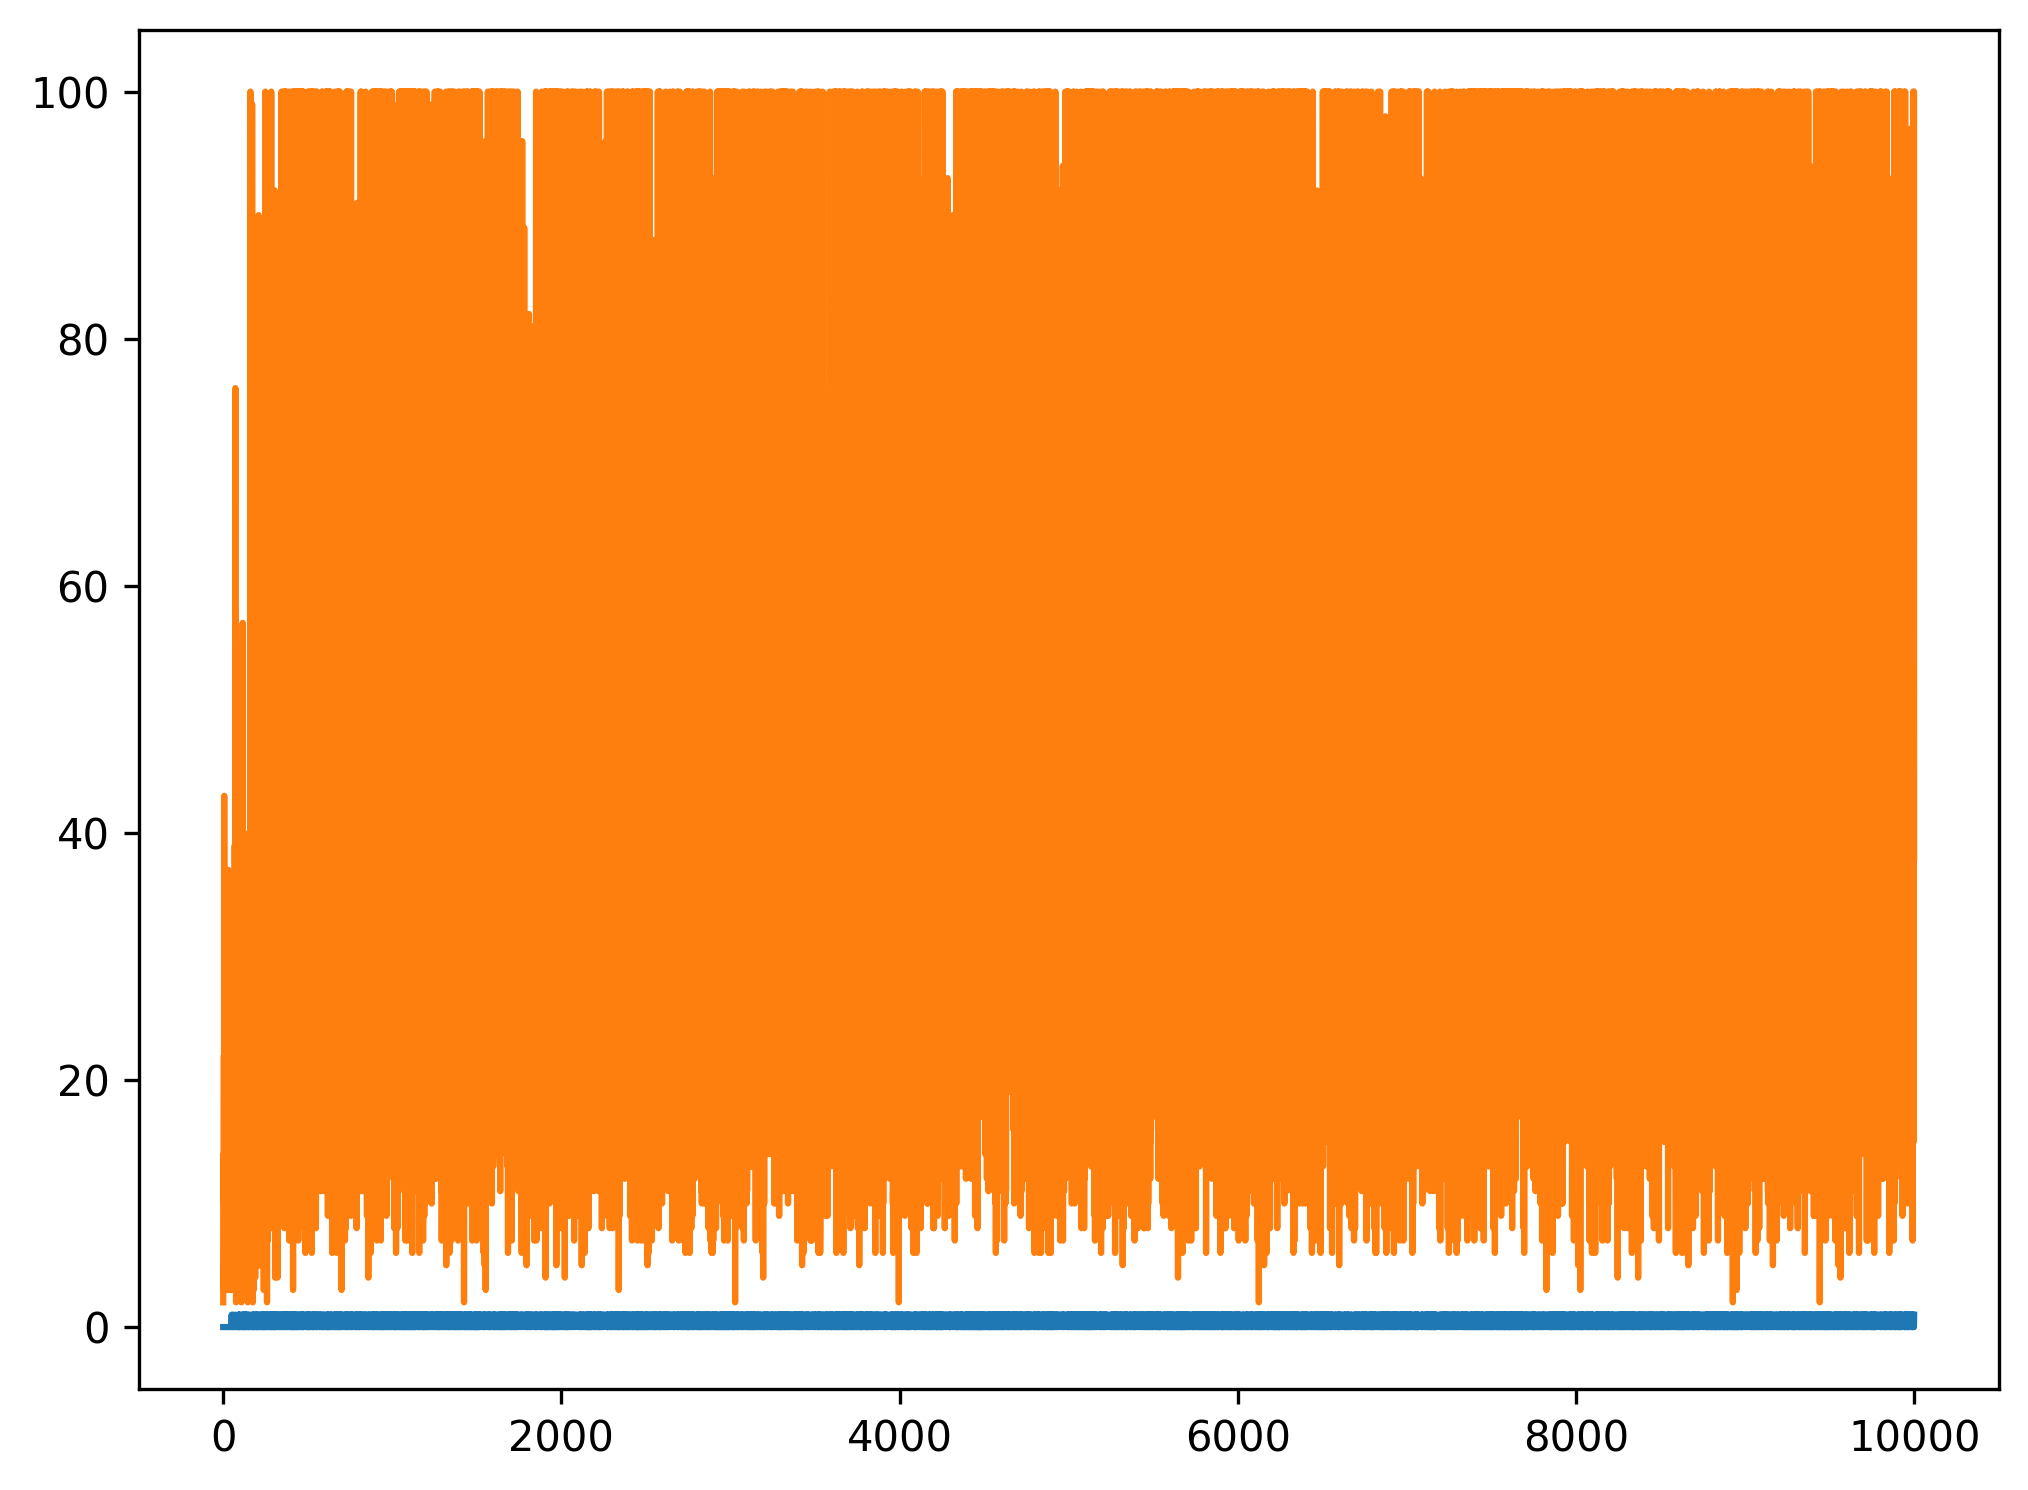

In [ ]:
figure(figsize=(8, 6), dpi=300)
plt.plot(rewards_all_episodes)
plt.plot(episode_steps)

# **Slippery Floor**





Actions are not hardcoded. An agent may take an action but in certain situation the action won't expect as expected. For example an agent may execute a "Right" action, but the new state goes  "Down". 

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=True).unwrapped
o = env
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
#Creating the Q-Table
#Actions  by NumberofStates
# 16 rows by 4 cols
Qtable  =  np.zeros((env.observation_space.n,env.action_space.n));
print(Qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100 #max number of steps before termiantion
BATCH_SIZE = 128
GAMMA = 0.999 #Discount rate
ALPHA = 0.1  #Learning rate
EPS_START = 0.9   #exploration rate
EPS_MAX = 0.9
EPS_END = 0.05  #min exploiration rate
EPS_DECAY = 200 #exploration rate of decay
TARGET_UPDATE = 10

In [ ]:
episode_steps = []
rewards_all_episodes = []

In [ ]:
for i_episode in range(num_episodes):
    state = env.reset()
    done =  False
    episodereward =  0
    steps = 0
    #We manually set the reward to 0 and the current state as non termianl. Initilize the first state in the episdoe to the starting point
    for i_steps in range(max_steps_per_episode):
          sample = random.random()
          eps_threshold = EPS_END + (EPS_START - EPS_END) * \
              math.exp(-1. * steps / EPS_DECAY)
          if (sample >  eps_threshold):
            action  =  np.argmax(Qtable[state,:])
          else:
            action = env.action_space.sample()
          #Take action based on the qtable or take a random action
          next_state,reward,done,_ =  env.step(action)
          #Update the Q table
          Qtable[state, action] = Qtable[state, action] * (1 - ALPHA) + \
            ALPHA * (reward + GAMMA * np.max(Qtable[next_state, :]))
          state = next_state
          episodereward += reward 
          steps = steps + 1
          if done == True:
            break
print(Qtable)

[[0.77680672 0.77418666 0.77209595 0.7714055 ]
 [0.5242188  0.47505929 0.39722063 0.76429712]
 [0.68265835 0.69500717 0.68569309 0.75361715]
 [0.54679853 0.40139973 0.49514819 0.74344778]
 [0.77832356 0.60172027 0.60045749 0.2851195 ]
 [0.         0.         0.         0.        ]
 [0.53669179 0.38793708 0.47275434 0.13877887]
 [0.         0.         0.         0.        ]
 [0.53436844 0.70793586 0.40541237 0.78084442]
 [0.57692568 0.78350566 0.43717033 0.43309121]
 [0.72975704 0.4826425  0.48150377 0.45531289]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47446827 0.50981856 0.83556291 0.48063125]
 [0.80604542 0.89684062 0.93453046 0.88117759]
 [0.         0.         0.         0.        ]]


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100 #max number of steps before termiantion
BATCH_SIZE = 128
GAMMA = 0.999 #Discount rate
ALPHA = 0.1  #Learning rate
EPS_START = 0.9   #exploration rate
EPS_MAX = 0.9
EPS_END = 0.01  #min exploiration rate
EPS_DECAY = 0.01 #exploration rate of decay
TARGET_UPDATE = 10

In [ ]:
for i_episode in range(num_episodes):
    state = env.reset()
    done =  False
    episodereward =  0
    steps = 0
    #We manually set the reward to 0 and the current state as non termianl. Initilize the first state in the episdoe to the starting point
    for i_steps in range(max_steps_per_episode):
          sample = random.random()
          if (sample >  EPS_START):
            action  =  np.argmax(Qtable[state,:])
          else:
            action = env.action_space.sample()
          #Take action based on the qtable or take a random action
          next_state,reward,done,_ =  env.step(action)
          #Update the Q table
          Qtable[state, action] = Qtable[state, action] * (1 - ALPHA) + \
            ALPHA * (reward + GAMMA * np.max(Qtable[next_state, :]))
          state = next_state
          episodereward += reward 
          steps = steps + 1
          if done == True:
            break
#Update the exploration rate after every epsiode
    EPS_START = EPS_END + \
    (EPS_MAX - EPS_END) * math.exp(-EPS_DECAY*i_episode)
#Update the total reward and steps for the episode
    rewards_all_episodes.append(episodereward)
    episode_steps.append(steps)

print(Qtable)

[[0.79125707 0.77695087 0.76479642 0.77449668]
 [0.42912095 0.55592858 0.39399452 0.77818608]
 [0.67018364 0.62673472 0.6530516  0.76974167]
 [0.5688802  0.48365706 0.49146872 0.76344255]
 [0.79371599 0.50729786 0.61778239 0.53378137]
 [0.         0.         0.         0.        ]
 [0.40988078 0.1866949  0.24521513 0.16856021]
 [0.         0.         0.         0.        ]
 [0.46444314 0.44428649 0.42734603 0.8020743 ]
 [0.43046564 0.81673343 0.4351143  0.47644591]
 [0.79879222 0.58953762 0.56419685 0.37489029]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.5163308  0.65074563 0.9002652  0.44304579]
 [0.80519058 0.95472283 0.8350291  0.84878241]
 [0.         0.         0.         0.        ]]


In [ ]:
print(rewards_all_episodes)
print(episode_steps)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

In [ ]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.5060000000000003
2000 :  0.6920000000000005
3000 :  0.6910000000000005
4000 :  0.6690000000000005
5000 :  0.6740000000000005
6000 :  0.6480000000000005
7000 :  0.6180000000000004
8000 :  0.6740000000000005
9000 :  0.6270000000000004
10000 :  0.6770000000000005


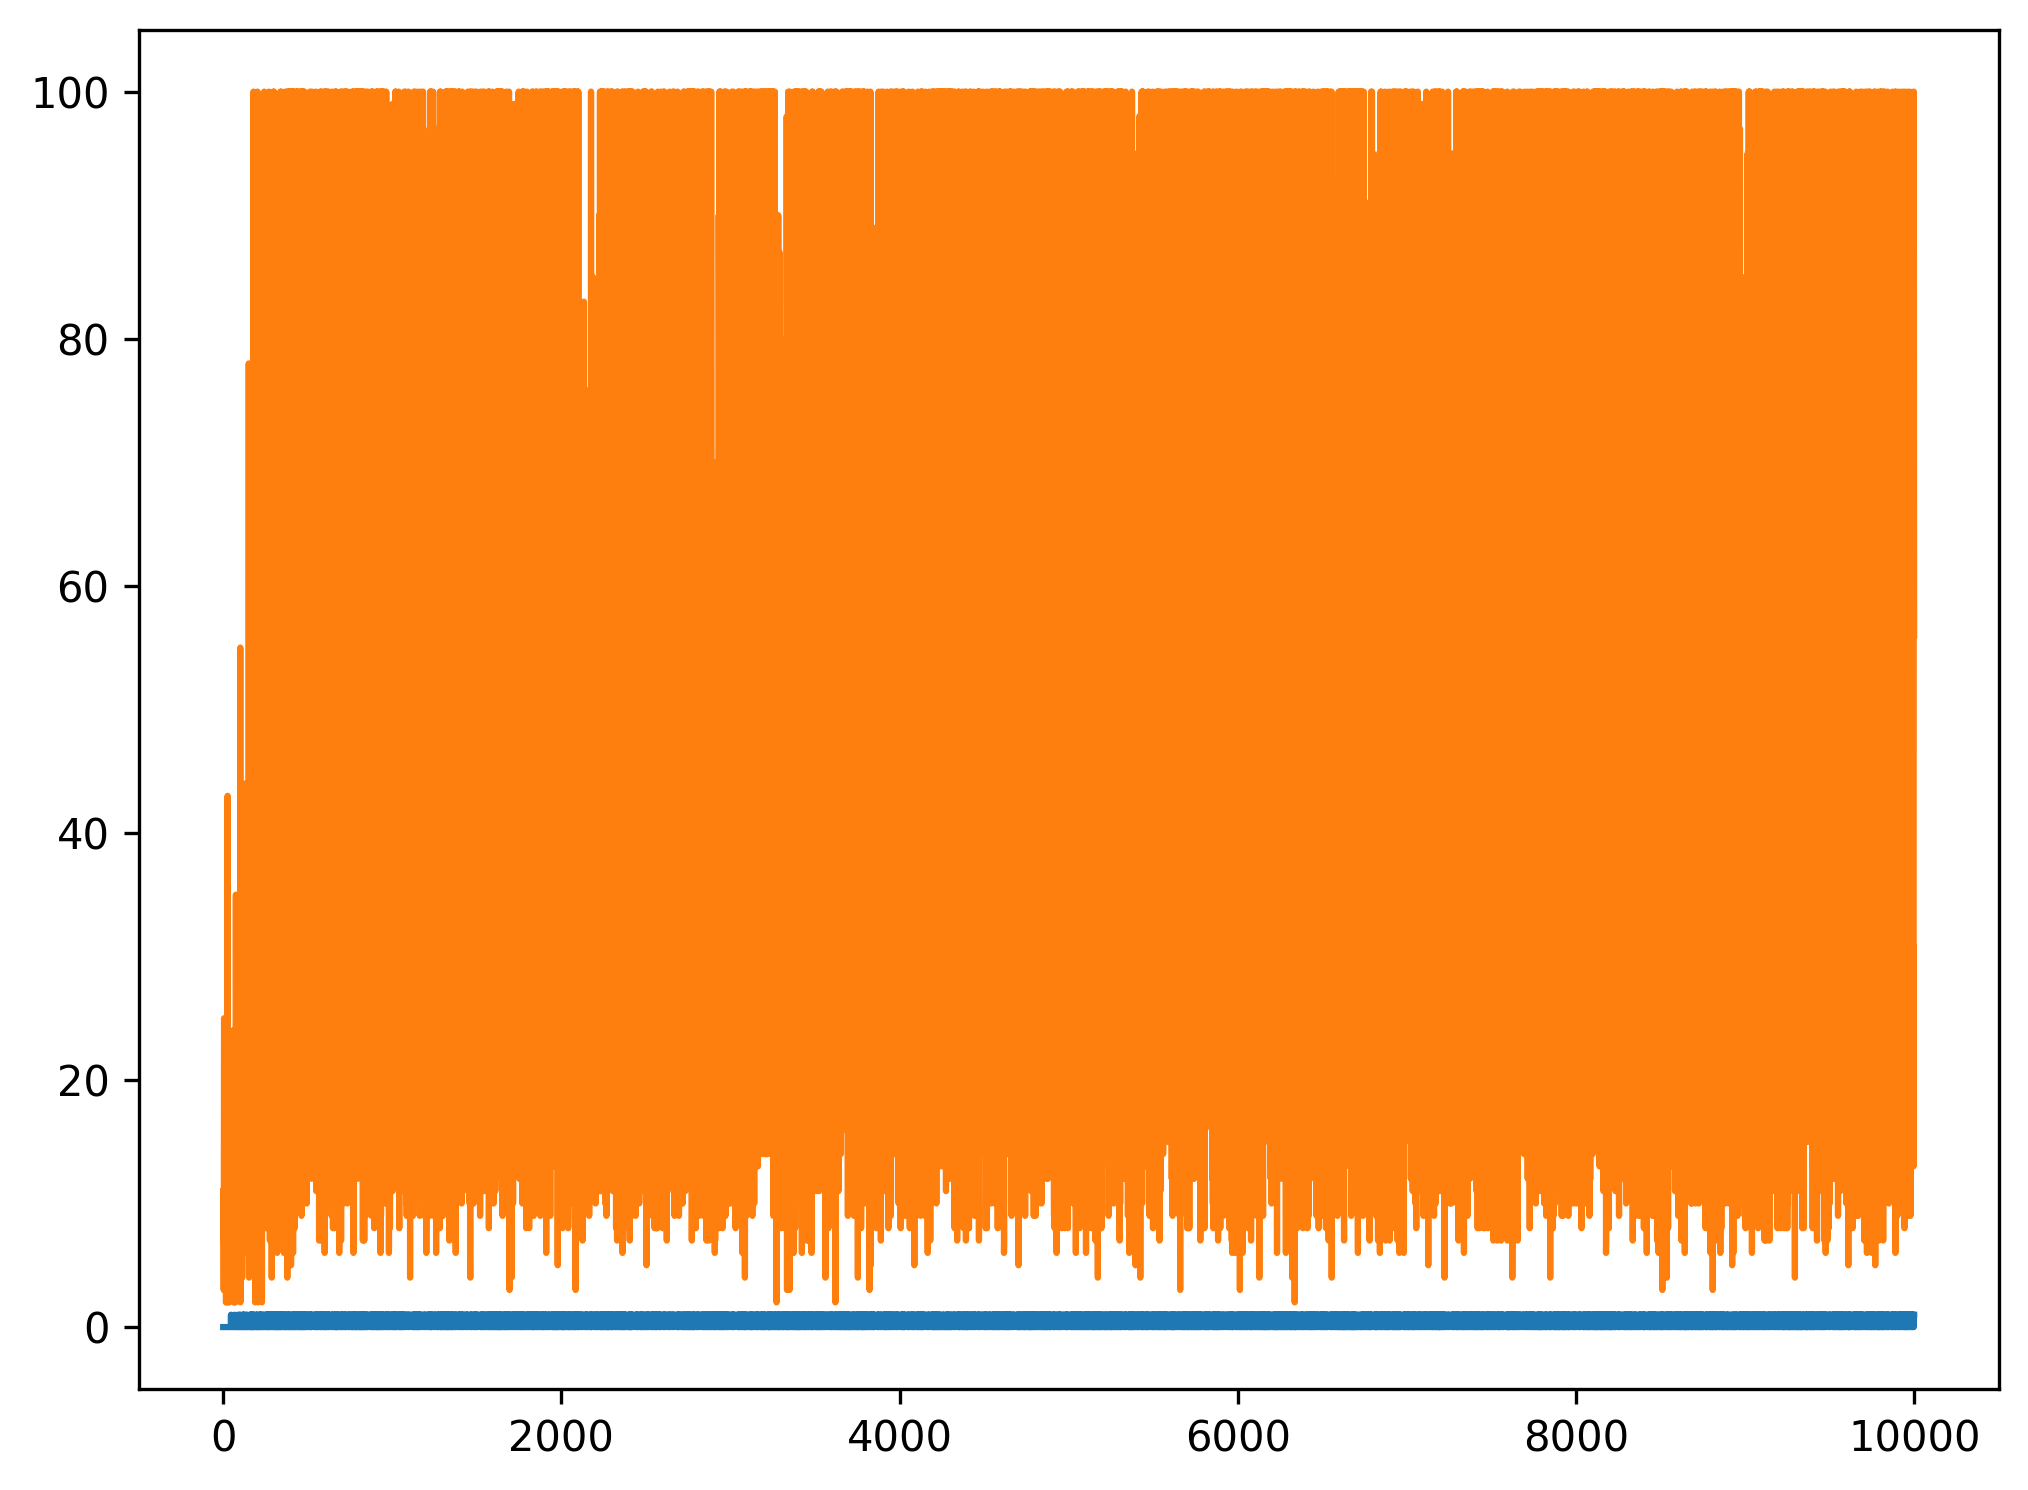

In [ ]:
figure(figsize=(8, 6), dpi=300)
plt.plot(rewards_all_episodes)
plt.plot(episode_steps)

# Value Iteration

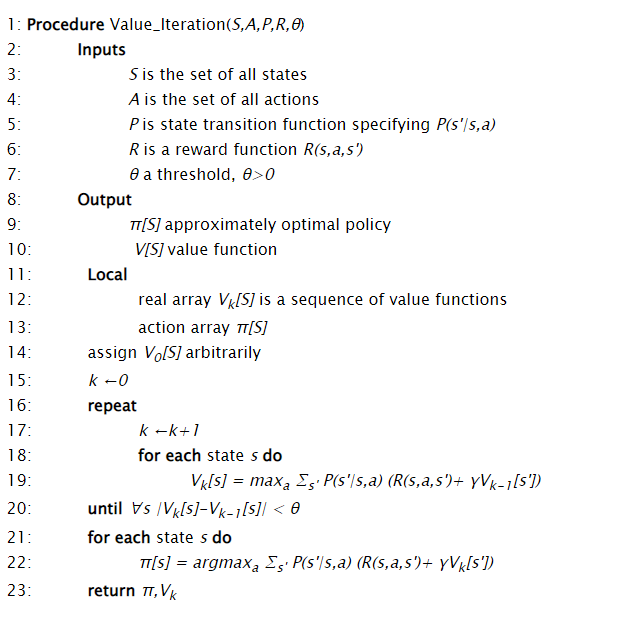

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=False).unwrapped

env.render()
GAMMA = 0.999
theta = 0.0001
states = 16
actions = 4
    
stateValue = np.zeros(states)
while True:
    delta = 0
    for s in range(states):
        A = np.zeros(actions)
        for a in range(actions):
          for prob, next_state, reward, done in env.P[s][a]:
            A[a] += prob * (reward + GAMMA * stateValue[next_state])
        best_action_value = np.max(A)
        delta = max(delta, np.abs(best_action_value - stateValue[s]))
        stateValue[s] = best_action_value         
    if delta < theta:
        break

policy = np.zeros([states, actions])
for s in range(states):
    A = np.zeros(actions)
    for a in range(actions):
      for prob, next_state, reward, done in env.P[s][a]:
        A[a] += prob * (reward + GAMMA * stateValue[next_state])
    best_action = np.argmax(A)
    policy[s, best_action] = 1.0
    


SFFF
FHFH
FFFH
HFFG


In [ ]:
print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=left, 1=down, 2=right, 3=up):")
print(np.reshape(np.argmax(policy, axis=1), (4,4)))
print(" ")

print("Value Function:")
print(stateValue)
print("")

print("Reshaped Grid Value Function:")
print(stateValue.reshape((4,4)))
print("")

Policy Probability Distribution:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=left, 1=down, 2=right, 3=up):
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]
 
Value Function:
[0.99500999 0.996006   0.997003   0.996006   0.996006   0.
 0.998001   0.         0.997003   0.998001   0.999      0.
 0.         0.999      1.         0.        ]

Reshaped Grid Value Function:
[[0.99500999 0.996006   0.997003   0.996006  ]
 [0.996006   0.         0.998001   0.        ]
 [0.997003   0.998001   0.999      0.        ]
 [0.         0.999      1.         0.        ]]

